<a href="https://colab.research.google.com/github/Aaron-Pereira/Computer-Science-Projects/blob/main/Heart_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Disease Classification**

In [7]:
# Import libraries to use Google Drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Import pandas library
import pandas as pd

# Create file
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1xivMmXvjNx24LRDCJs6qVGJqI2Iu5X2m'
download = drive.CreateFile({'id': file_id})


# Download the file to a local disc
download.GetContentFile('file.csv')
df  = pd.read_csv("file.csv")
df.head()





,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


## **Perform basic data analysis**

In [8]:
print(df.shape)
# There are 1190 rows and 12 columns

print(df.columns)

# Prints out column name and data type of each feature
print(df.info())

# Prints basic statistical characteristics
print(df.describe())

# How many people were diagnosed with heart disease?
print("There were " + str(df['target'].sum()) + " patients diagnosed with heard disease")

(1190, 12)
Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target     

## **Data Visualisation**

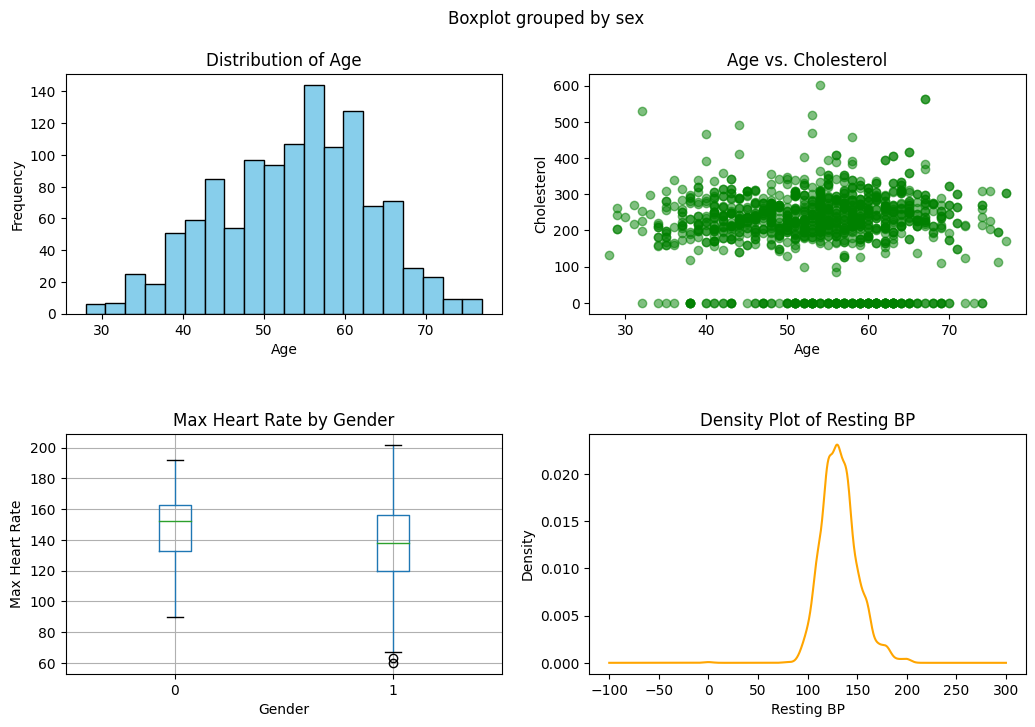

In [9]:
import matplotlib.pyplot as plt

# Create a figure and subplots for visualization
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)

# Plot 1: Histogram of 'age'
axes[0, 0].hist(df['age'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Age')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Plot 2: Scatter plot of 'age' vs. 'chol' (cholesterol)
axes[0, 1].scatter(df['age'], df['cholesterol'], alpha=0.5, color='green')
axes[0, 1].set_title('Age vs. Cholesterol')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Cholesterol')

# Plot 3: Box plot of 'thalach' (max heart rate) by 'sex'
df.boxplot(column='max heart rate', by='sex', ax=axes[1, 0])
axes[1, 0].set_title('Max Heart Rate by Gender')
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Max Heart Rate')

# Plot 4: Density plot of 'trestbps' (resting blood pressure)
df['resting bp s'].plot(kind='density', ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Density Plot of Resting BP')
axes[1, 1].set_xlabel('Resting BP')

# Display the plots
plt.show()

## **Define Logistic Regression class**

In [18]:
# Use numpy for handling arrays
import numpy as np
# Use time to provide analysis on compilation time
import time

# Define a python class which will contain methods for training and predictions
class LogisticRegression:
    # Define the default learning rate and number of iterations
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        # Set learning rate and number of iterations to constructor arguments
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        # Set weights and bias initially to none
        self.weights = None
        self.bias = None

    # Define sigmoid function used to transform model output to probability between 0 and 1
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    # Define binary cross-entropy loss function
    def binary_cross_entropy_loss(self, y_true, y_pred):
        m = len(y_true)
        # Calculate the loss for each sample and average it
        loss = -(1 / m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return loss

    # Method for training the model using input features 'X' and target labels 'y'
    def fit(self, X, y):
        # Get number of samples and number of features from 'X'
        m, n = X.shape
        # Set weights for each feature to 0 initially
        self.weights = np.zeros(n)
        # print("Weights: ", self.weights)
        # Set bias to 0 initially
        self.bias = 0
        # print("bias: ", self.bias)

        # List to store the loss at each iteration
        self.losses = []

        # Update weights and bias using gradient descent
        # Will update iteratively per number of iterations set
        for _ in range(self.num_iterations):
            # Get dot product of each feature and feature weight and add bias
            z = np.dot(X, self.weights) + self.bias
            # Apply sigmoid function to obtain probability (between 0 and 1)
            predictions = self.sigmoid(z)

            # Calculate the loss using binary cross-entropy loss
            loss = self.binary_cross_entropy_loss(y, predictions)

            # Append the loss to the list
            self.losses.append(loss)

            # Print the loss at each iteration
            # print("Iteration", _, "Loss:", loss)

            # Calculate the gradient of the weights with respect to loss
            # Gradient will indicate how the weights will be adjusted
            dw = (1 / m) * np.dot(X.T, (predictions - y))
            # print("dw: ", dw)

            # Calculate the gradient of the bias with respect to loss
            db = (1 / m) * np.sum(predictions - y)
            # print("db: ", db)

            # Update weights for each feature by (self learning rate * gradient of weights)
            self.weights -= self.learning_rate * dw
            # Update bias
            self.bias -= self.learning_rate * db



    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return [1 if p >= 0.5 else 0 for p in predictions]



In [19]:

# Extract features and target variable
# X contains the input features
X = df.drop('target', axis=1).values
# y contains the target labels
y = df['target'].values


# Using scikit learn only to split dataset into training and testing
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# test_size indicates the percentage of data to be used for testing
# random_state ensures reproducability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Start measuring the training time
start_time = time.time()

# Train the model
# Create an instance of LogisticRegression class with specific hyperparameters
# Hyperparameters chosen after experimentation with different values

LRModel = LogisticRegression(learning_rate=0.0001,num_iterations=10000)

# Train the model using the training dataset
LRModel.fit(X_train, y_train)

# Stop measuring the training time
end_time = time.time()

training_time = end_time - start_time

print("Training time:", training_time, "seconds")

Training time: 3.6408638954162598 seconds


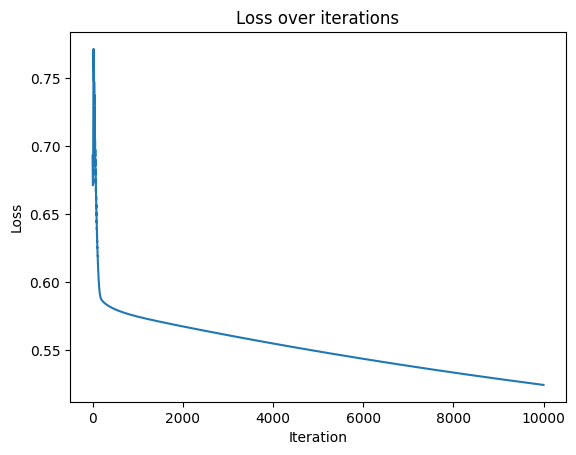

In [20]:
# Plot the loss over iterations
plt.plot(LRModel.losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over iterations')
plt.show()

In [21]:

# Access and print the weights
weights = LRModel.weights
print("Weights assigned to each feature:")
for feature, weight in zip(df.columns[:-1], weights):
    print(f"{feature}: {weight}")

print("\n")

# Print the shape of the dataset
print("Shape of the dataset: ", X.shape)

print("\n")

# Make predictions
y_pred = LRModel.predict(X_test)

# print(df.columns)
print(X_test[0], ", y_prediction: " + str(y_pred[0]), ", Actual y value: " + str(y[0]))
print(X_test[1], ", y_prediction: " + str(y_pred[1]), ", Actual y value: " + str(y[1]))
print(X_test[2], ", y_prediction: " + str(y_pred[2]), ", Actual y value: " + str(y[2]))
print(X_test[3], ", y_prediction: " + str(y_pred[3]), ", Actual y value: " + str(y[3]))
print(X_test[4], ", y_prediction: " + str(y_pred[4]), ", Actual y value: " + str(y[4]))
print(X_test[5], ", y_prediction: " + str(y_pred[5]), ", Actual y value: " + str(y[5]))
print(X_test[6], ", y_prediction: " + str(y_pred[6]), ", Actual y value: " + str(y[6]))
print(X_test[7], ", y_prediction: " + str(y_pred[7]), ", Actual y value: " + str(y[7]))


print("\n")

# Index(['age', 'sex : 1 is male', 'chest pain type', 'resting bp s', 'cholesterol',
 # 'fasting blood sugar', 'resting ecg', 'max heart rate',
# 'exercise angina', 'oldpeak', 'ST slope', 'target']

print(X_test[0])


user_data_point = [65, 0, 4, 140, 220, 1, 2, 108, 1, 1.5, 2]
user_data_point1 = [35, 1, 2, 130, 280, 0, 1, 100, 0, 0.0, 1]
user_prediction = LRModel.predict([user_data_point])
print("User prediction: ", user_prediction)
user_prediction1 = LRModel.predict([user_data_point1])
print("User prediction1: ", user_prediction1)

Weights assigned to each feature:
age: 0.038350629583305894
sex: 0.04562820156171084
chest pain type: 0.1453781160943332
resting bp s: 0.009927006634362943
cholesterol: -0.0032118161435568983
fasting blood sugar: 0.0223356583980799
resting ecg: 0.021457050647878957
max heart rate: -0.02446879168869484
exercise angina: 0.06919668914922408
oldpeak: 0.13596304019294678
ST slope: 0.10107625522066478


Shape of the dataset:  (1190, 11)


[ 61.   1.   4. 160.   0.   1.   1. 145.   0.   1.   2.] , y_prediction: 1 , Actual y value: 0
[ 54.    1.    3.  120.  237.    0.    0.  150.    1.    1.5   2. ] , y_prediction: 0 , Actual y value: 1
[ 55.   0.   2. 122. 320.   0.   0. 155.   0.   0.   1.] , y_prediction: 0 , Actual y value: 0
[ 56.   1.   4. 155. 342.   1.   0. 150.   1.   3.   2.] , y_prediction: 1 , Actual y value: 1
[ 60.    0.    4.  150.  258.    0.    2.  157.    0.    2.6   2. ] , y_prediction: 1 , Actual y value: 0
[ 56.   1.   4. 125.   0.   1.   0. 103.   1.   1.   2.] , y_predi

In [22]:
# Accuracy
def accuracy(y_true,y_pred):
  # Calculate accuracy as number of correctly predicted predictions / total predictions
  accuracy = np.sum(y_true == y_pred)/len(y_true)

  return accuracy

predictions = LRModel.predict(X_test)
# Calculate accuracy score using the function
accuracy_score = accuracy(y_test, predictions)
print("Accuracy: ", accuracy_score)

# Precision
def calculate_precision(y_true, y_pred):
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)

  TP = np.sum((y_true == 1) & (y_pred == 1))
  FP = np.sum((y_true == 0) & (y_pred == 1))

  # Calculate Precision
  precision = TP / (TP + FP) if (TP + FP) != 0 else 0.0

  return precision

# Calculate the precision score using the function
precision_score = calculate_precision(y_test, predictions)
print("Precision:", precision_score)

# Recall -> Sensitivity
def calculate_recallSensitivity(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    # Calculate recall
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0.0

    return recall

# Calculate the recall score using the function
recallSensitivity_score = calculate_recallSensitivity(y_test, predictions)
print("Recall Sensitivity:", recallSensitivity_score)


# Recall -> Specificity
def calculate_recallSpecificity(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    # Calculate recall
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0.0

    return specificity

# Calculate the recall score using the function
recallSpecificity_score = calculate_recallSpecificity(y_test, predictions)
print("Recall Specificity:", recallSpecificity_score)

# F1 Score
f1_score = 2*((precision_score*recallSensitivity_score)/ (precision_score+recallSensitivity_score))
print("F1 Score: ", f1_score)


Accuracy:  0.7478991596638656
Precision: 0.7751937984496124
Recall Sensitivity: 0.7633587786259542
Recall Specificity: 0.7289719626168224
F1 Score:  0.7692307692307694
